In [1]:
import gpxpy
import gpxpy.gpx
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from folium.vector_layers import Rectangle
from shapely.geometry import LineString

In [2]:
import numpy as np
import gpxpy

gpx_file = open('/Users/ashwin/Desktop/other gpx/fa5fffa3-4730-44fe-889a-d7adf2d786a0_767.gpx', 'r')
gpx = gpxpy.parse(gpx_file)
qt1 = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            qt1.append((point.latitude, point.longitude))

observations_array = np.array(qt1)
print(len(observations_array))

274


In [4]:
import folium
from gpxpy import parse

gpx_file1 = open('/Users/ashwin/Desktop/other gpx/fa5fffa3-4730-44fe-889a-d7adf2d786a0_767.gpx', 'r')
gpx = parse(gpx_file1)

map_center1 = [gpx.tracks[0].segments[0].points[0].latitude, gpx.tracks[0].segments[0].points[0].longitude]
mymap1 = folium.Map(location=map_center1, zoom_start=12)

for track in gpx.tracks:
    for segment in track.segments:
        lat_lon_pairs1 = [(point.latitude, point.longitude) for point in segment.points[:274]]  
        folium.PolyLine(lat_lon_pairs1, color="blue", weight=2.5, opacity=1).add_to(mymap1)

mymap1

In [5]:
import folium
from shapely.geometry import LineString
import gpxpy

gpx_file1 = open('/Users/ashwin/Desktop/other gpx/fa5fffa3-4730-44fe-889a-d7adf2d786a0_767.gpx', 'r')
gpx = gpxpy.parse(gpx_file1)

all_points1 = []
for track in gpx.tracks:
    for segment in track.segments:
        all_points1.extend([(point.longitude, point.latitude) for point in segment.points[:274]]) 

route_line1 = LineString(all_points1)
buffer_distance1 = 0.001  
route_buffer1 = route_line1.buffer(buffer_distance1)
map_center1 = route_line1.centroid.coords[0][::-1] 
mymap1 = folium.Map(location=map_center1, zoom_start=14)
lat_lon_pairs1 = [(point[1], point[0]) for point in route_line1.coords]
folium.PolyLine(lat_lon_pairs1, color="blue", weight=2.5, opacity=1).add_to(mymap1)
route_buffer_geojson1 = route_buffer1.__geo_interface__
folium.GeoJson(route_buffer_geojson1, name='geofence').add_to(mymap1)
mymap1


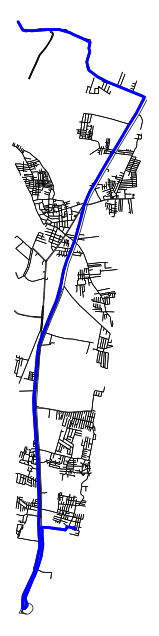

In [6]:
import osmnx as ox
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
route_polygon1 = route_buffer1.convex_hull
G1 = ox.graph_from_polygon(route_polygon1, network_type='drive')
fig1, ax1 = ox.plot_graph(G1, bgcolor='w', edge_color='k', edge_linewidth=0.5, node_size=0, show=False, close=False)
route_line_buffer1 = route_line1.buffer(0.0001)  
ax1.plot(*route_line_buffer1.exterior.xy, color='blue', linewidth=1)
ax1.plot(*route_line_buffer1.exterior.xy[:274], color='blue', linewidth=1)
plt.show()


In [7]:
import osmnx as ox
import numpy as np
from shapely.geometry import LineString
route_polygon1 = route_buffer1.convex_hull
G1 = ox.graph_from_polygon(route_polygon1, network_type='drive')
states1 = np.array([(data1['y'], data1['x']) for node, data1 in G1.nodes(data=True)])
print("Number of nodes:", len(states1))
print("Node coordinates:")
for node in states1:
    print(node)

Number of nodes: 1700
Node coordinates:
[13.0952244 77.5941775]
[13.1195154 77.6093692]
[13.0935024 77.5898023]
[13.097005  77.5921009]
[13.0983442 77.5906057]
[13.1012236 77.5986907]
[13.0573653 77.5932674]
[13.0576689 77.5914225]
[13.0575094 77.5908977]
[13.0695751 77.6016847]
[13.065769  77.6003171]
[13.0659971 77.5991062]
[13.0659708 77.5985405]
[13.0662992 77.5972833]
[13.0672467 77.592928 ]
[13.104396  77.6048914]
[13.1036366 77.6002543]
[13.0573599 77.593541 ]
[13.0470701 77.591751 ]
[13.0468211 77.5915134]
[13.1001976 77.5960318]
[13.1007918 77.5942627]
[13.055909  77.5979418]
[13.055882  77.5976921]
[13.0963535 77.5930354]
[13.043248  77.5905995]
[13.0429388 77.5910598]
[13.0433479 77.5907446]
[13.0430588 77.5902694]
[13.0433965 77.5904485]
[13.0430351 77.5906136]
[13.0672552 77.5932196]
[13.1043891 77.605506 ]
[13.1043909 77.6059805]
[13.1027097 77.6053828]
[13.1025342 77.6058806]
[13.1044067 77.6068435]
[13.1044342 77.607236 ]
[13.1022496 77.6074743]
[13.1043922 77.6050936]


In [8]:
import numpy as np
from math import exp, sqrt, pi

pairwise_distances = []
for i in range(len(qt1) - 1):
    x1, y1 = qt1[i]
    x2, y2 = qt1[i + 1]
    distance = sqrt((x2 - x1)**2 + (y2 - y1)**2)
    pairwise_distances.append(distance)
TRANS = np.zeros((len(states1), len(states1), len(qt1)-1))

beta = 0.95  

n = len(states1)
for k in range(len(qt1)-1):
    for i in range(n):
        for j in range(n):
            xtemp = np.linalg.norm(states1[i] - states1[j])
            dij = abs(xtemp - pairwise_distances[k])
            TRANS[i, j, k] = (1 / beta) * exp(-dij / beta)
        TRANS[i, :, k] = TRANS[i, :, k] / np.sum(TRANS[i, :, k])

sigztemp = []
for i in range(len(qt1)):
    for j in range(len(states1)):
        sigztemp.append(np.linalg.norm(qt1[i] - states1[j]))
sigz = 1.4 * np.median(sigztemp)

EMIS = np.zeros((len(states1), len(qt1)))
for i in range(len(qt1)):
    for j in range(len(states1)):
        EMIS[j, i] = (1 / (sqrt(2 * pi) * sigz)) * exp(-0.5 * ((np.linalg.norm(qt1[i] - states1[j])) / sigz) ** 2)

# seq = [1, 2, 3, 4]
seq = np.arange(1, len(qt1)+1)

PRIOR = np.array([(1 / len(states1))] * len(states1))
# PRIOR[358] = 0.7

T = len(seq)  # Number of observations
n = EMIS.shape[0]  # Number of states

score = np.zeros((n, T))
pred = np.zeros((n, T))

for i in range(n):
    score[i, 0] = PRIOR[i] * EMIS[i, seq[0] - 1]

for t in range(1, T):
    for j in range(n):
        tscore = np.zeros(n)
        for k in range(n):
            tscore[k] = score[k, t - 1] * TRANS[k, j, t - 1] * EMIS[j, seq[t] - 1]
        score[j, t] = np.max(tscore)
        id = np.where(tscore == np.max(tscore))[0][0]
        pred[j, t] = id

IT1 = np.zeros(T, dtype=int)
IT1[-1] = np.argmax(score[:, -1])

for t in range(T - 1, 0, -1):
    IT1[t - 1] = int(pred[IT1[t], t])

print(IT1)

KeyboardInterrupt: 